## DIABETES PREDICTION MODEL

#### MODEL OBJECTIVE
The goal is to predict the likelihood of diabetes onset, allowing for timely and targeted preventive measures.
This initiative will empower ABC Health to enhance patient outcomes, reduce the burden on healthcare resources, and play a proactive role in combating the diabetes epidemic.


In [234]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [107]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Ify\Documents\10Alytics\week 13\EDA assignment\diabetes_prediction_dataset.csv")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
# check the shape of the dataset
data.shape

(100000, 9)

In [8]:
# confirm the feature types and if there is a missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


From the dataset we can confirm that there is no non-null values and for the datatypes we have have 3 features that are float64, 4 taht are int64 and 2 that are object.
Going by the data dictionary, let's confirm if the values for the object data types are as it should be.

In [14]:
# Checking for duplicates
data.duplicated().sum()

3854

In [16]:
# since duplicates exist we will have to drop them.
data = data.drop_duplicates()

In [18]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [20]:
data.describe(include='object')

,gender,smoking_history
count,96146,96146
unique,3,6
top,Female,never
freq,56161,34398


In [22]:
data.sort_values(by='age').head(10000)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
29551,Male,0.08,0,0,No Info,13.55,6.1,145,0
13162,Male,0.08,0,0,No Info,27.32,6.1,126,0
81186,Female,0.08,0,0,No Info,12.77,4.5,160,0
63095,Female,0.08,0,0,No Info,13.39,6.1,90,0
38883,Male,0.08,0,0,No Info,14.92,3.5,90,0
...,...,...,...,...,...,...,...,...,...
58788,Male,10.00,0,0,No Info,27.32,4.5,100,0
75173,Male,10.00,0,0,No Info,15.73,5.8,85,0
84994,Female,10.00,0,0,No Info,17.40,4.8,140,0
58903,Female,10.00,0,0,No Info,13.86,6.6,160,0


The data seems not to have outliers as the mean and the median are close to each other. The object features has more unique values than what was stated on the data dictionary. let's analyze further and make the necessary amendments.

#### Univariate Analysis

In [26]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [28]:
# print out the unique values for the categorical features

print(f'The unique values for gender is: {data['gender'].unique()}')
print(f'The unique values for smoking_history is: {data['smoking_history'].unique()}')

The unique values for gender is: ['Female' 'Male' 'Other']
The unique values for smoking_history is: ['never' 'No Info' 'current' 'former' 'ever' 'not current']


<Axes: xlabel='gender', ylabel='count'>

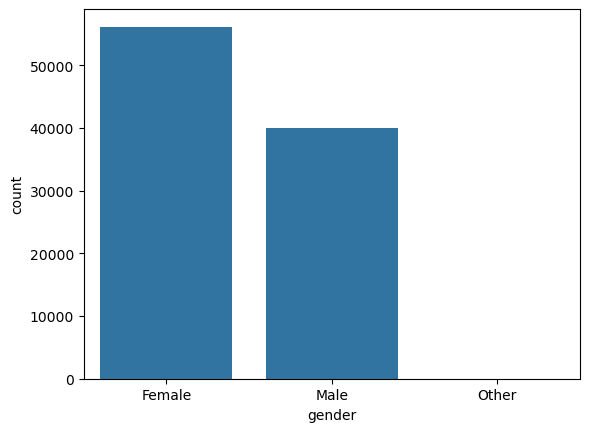

In [30]:
sns.countplot(x='gender', data=data)

In [32]:
data['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

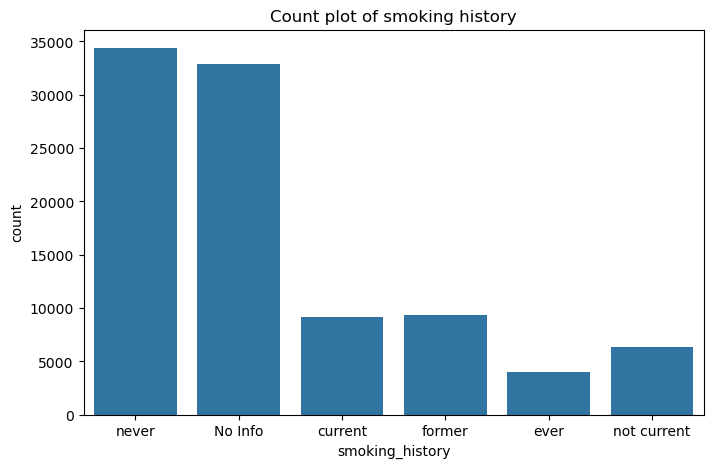

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(x='smoking_history', data=data)
plt.title('Count plot of smoking history')
plt.show()

Since we have only ('never', 'former', 'current') in the data dictionary provided.let's assume that the the value 'ever' means the patient never smoked, 'not current' means the patient is a former smoker then amend accordingly.

In [37]:

def smoking_hist_amend(resp):
    if resp == 'ever':
        return 'never'
    elif resp == 'not current':
        return 'former'
    else:
        return resp

data2 = data.copy()
data2['smoking_history'] = data2['smoking_history'].apply(smoking_hist_amend)
data2['smoking_history'].value_counts()

smoking_history
never      38396
No Info    32887
former     15666
current     9197
Name: count, dtype: int64

In [39]:
data1 = data.copy()
data1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [41]:
data1['smoking_history'] = data1['smoking_history'].replace(['ever', 'not current'], ['never', 'former'])
data1['smoking_history'].value_counts()

smoking_history
never      38396
No Info    32887
former     15666
current     9197
Name: count, dtype: int64

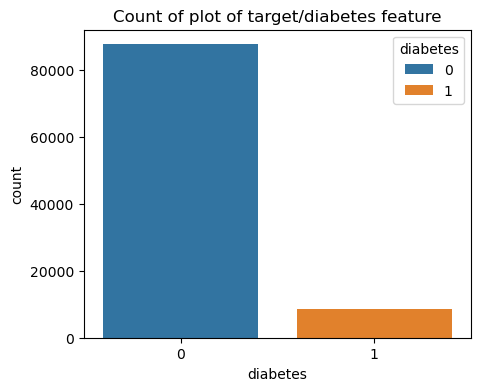

In [43]:
# Check for the 
plt.figure(figsize=(5,4))
sns.countplot(x='diabetes', data=data, hue='diabetes')
plt.title('Count of plot of target/diabetes feature')
plt.show()

In [45]:
numerical_df = data1.select_dtypes(exclude='object')

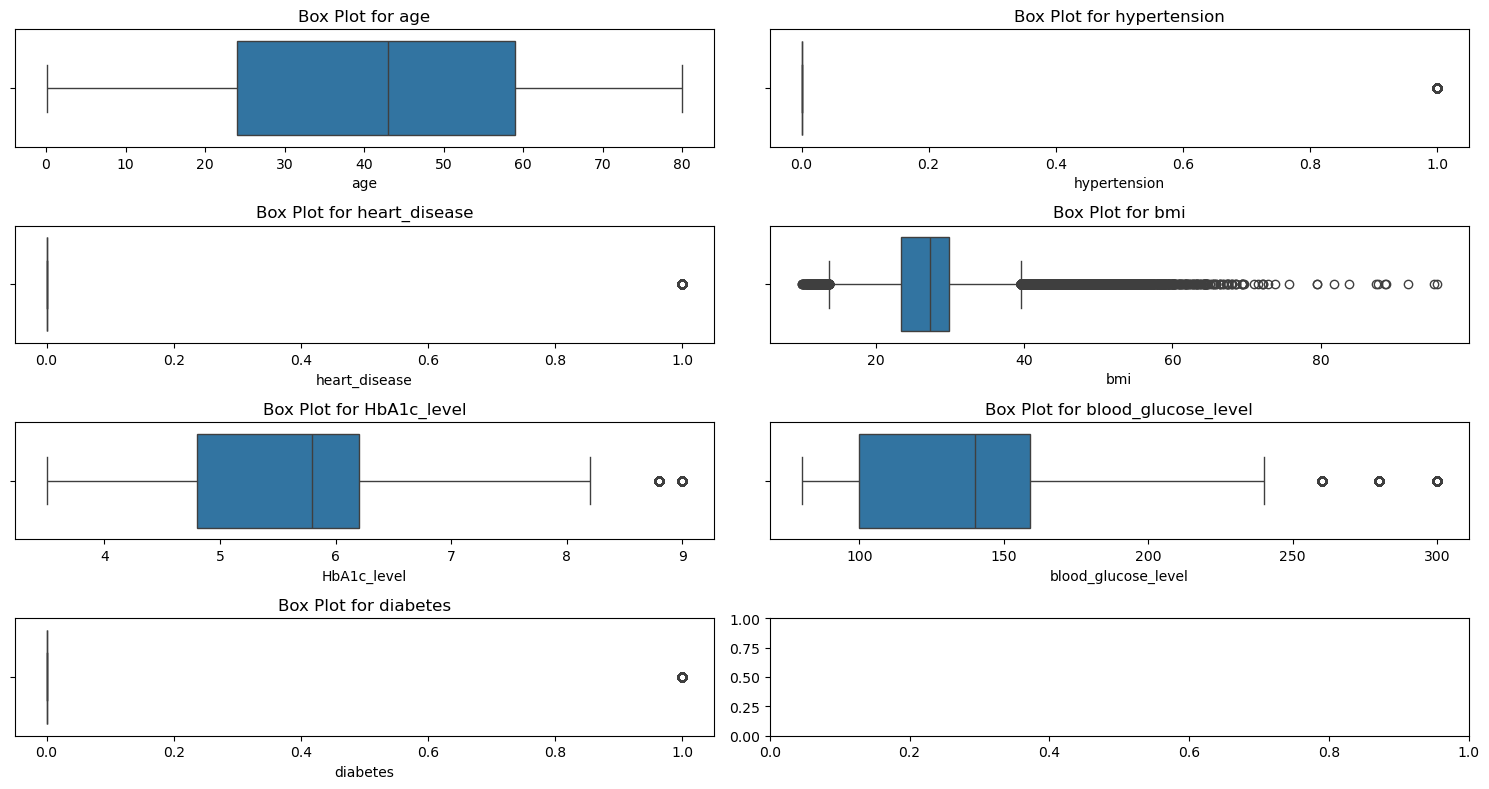

In [47]:
# Check for outliers
num_columns = numerical_df.columns
num_rows = (len(num_columns) + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15,8))

position = axes.flatten()

for index,name_of_feature in enumerate(num_columns):
    sns.boxplot(x=numerical_df[name_of_feature], ax=position[index])
    position[index].set_title(f'Box Plot for {name_of_feature}')

plt.tight_layout()

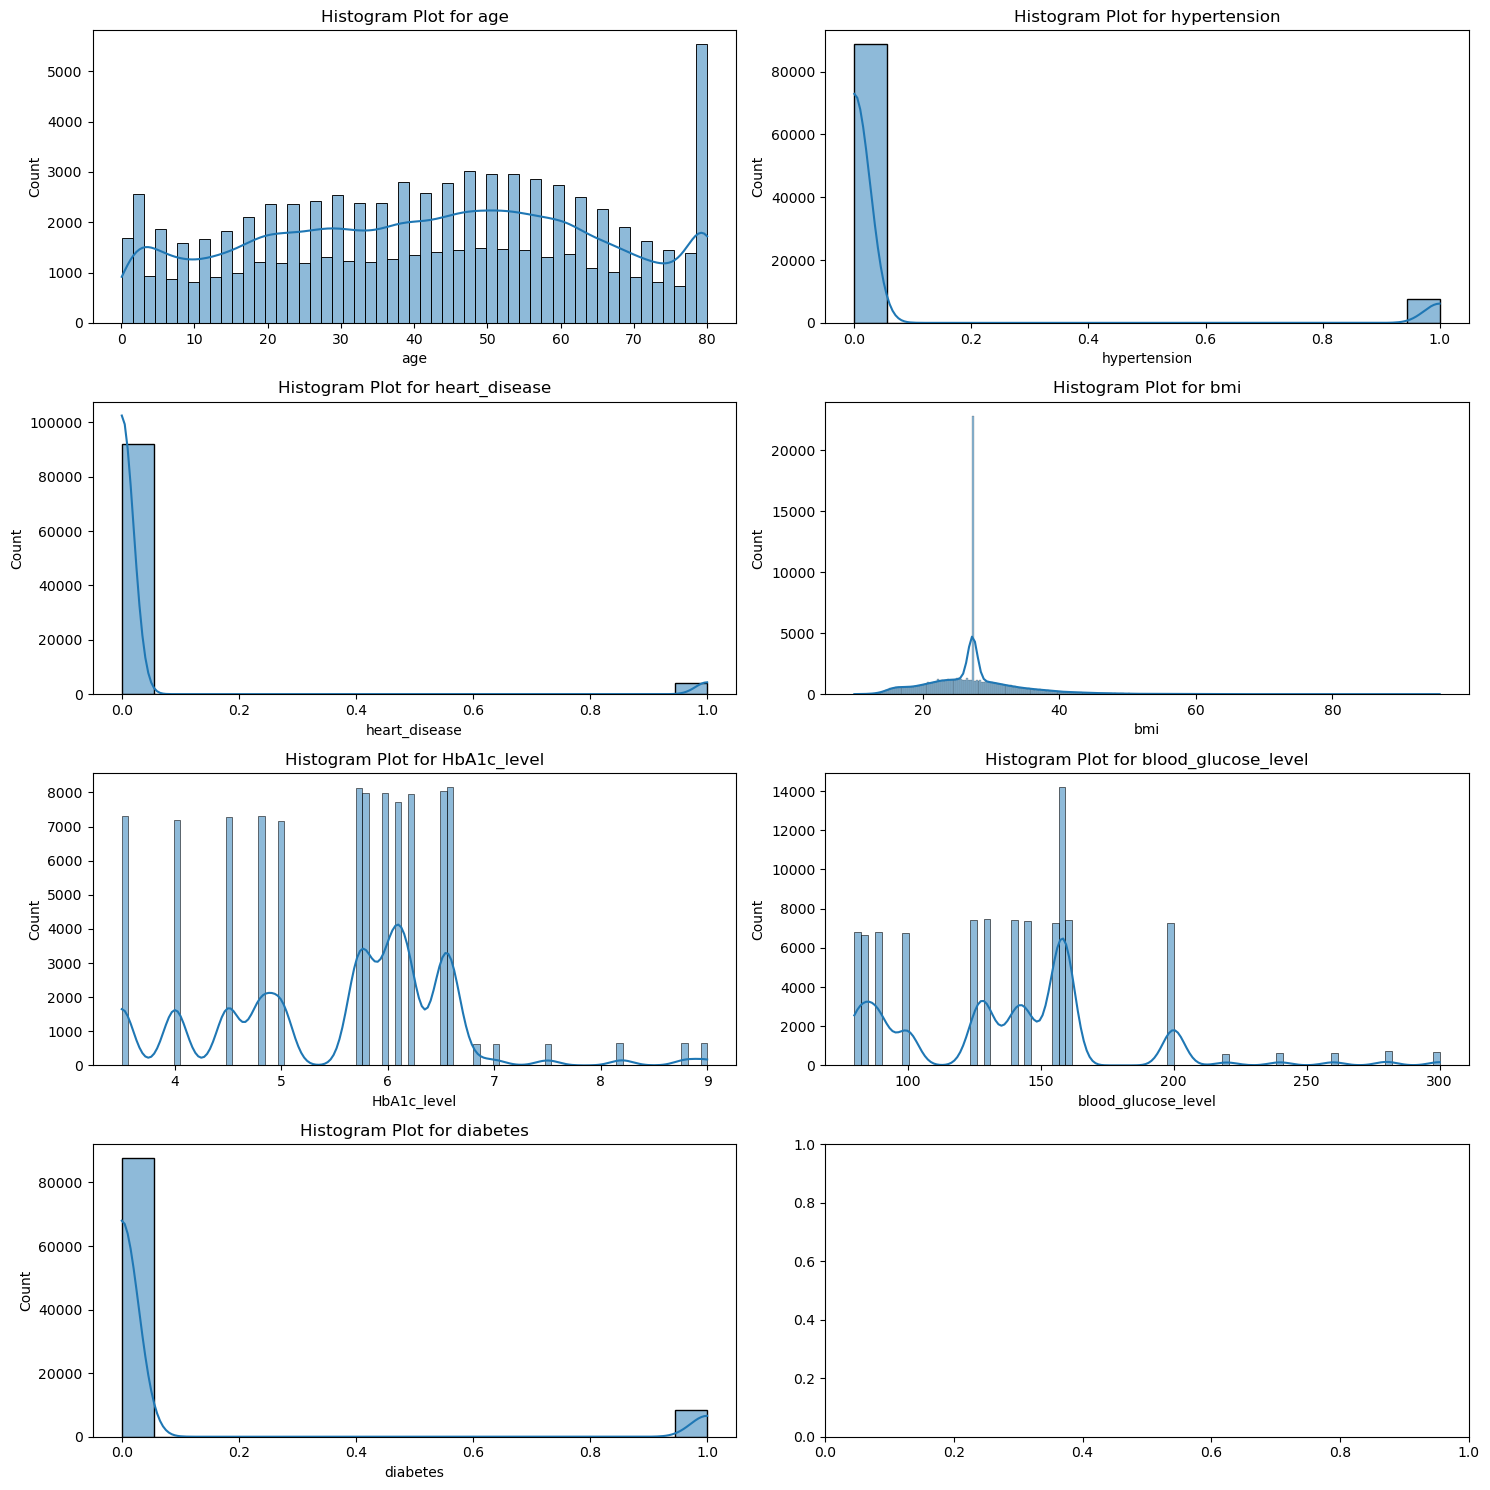

In [50]:
# Check for the distribution of our data
num_columns = numerical_df.columns
num_rows = (len(num_columns) + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15,15))

position = axes.flatten()

for index,name_of_feature in enumerate(num_columns):
    sns.histplot(x=numerical_df[name_of_feature], ax=position[index], kde=True)
    position[index].set_title(f'Histogram Plot for {name_of_feature}')

plt.tight_layout()

#### Bivariate Analysis

In [74]:
def age_bracket(age):
    if age <= 10:
        return "Children(<=12)"
    elif age <= 17:
        return "Teens(<=17)"
    elif age <= 35:
        return "Young Adult(<=35)"
    elif age <= 50:
        return "Adult(<=50)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"

data1["age_bracket"] = data1["age"].apply(age_bracket)

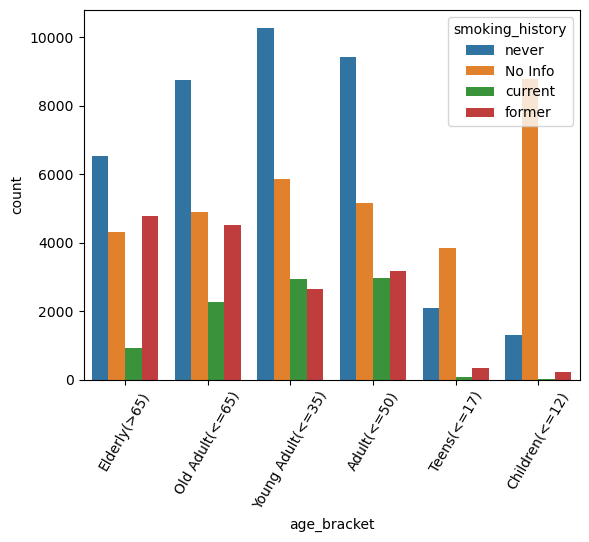

In [102]:
# Investigating age bracket by smoking History 
sns.countplot(x='age_bracket', hue='smoking_history', data=data1)
plt.xticks(rotation=60);

In [78]:
data1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_bracket
0,Female,80.0,0,1,never,25.19,6.6,140,0,Elderly(>65)
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Old Adult(<=65)
2,Male,28.0,0,0,never,27.32,5.7,158,0,Young Adult(<=35)
3,Female,36.0,0,0,current,23.45,5.0,155,0,Adult(<=50)
4,Male,76.0,1,1,current,20.14,4.8,155,0,Elderly(>65)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Elderly(>65)'),
  Text(1, 0, 'Old Adult(<=65)'),
  Text(2, 0, 'Young Adult(<=35)'),
  Text(3, 0, 'Adult(<=50)'),
  Text(4, 0, 'Teens(<=17)'),
  Text(5, 0, 'Children(<=12)')])

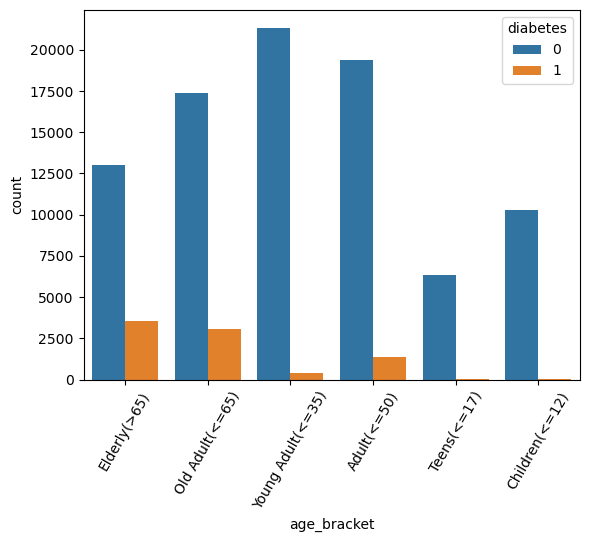

In [92]:
# Investigating age bracket by diabetes 
sns.countplot(x='age_bracket', hue='diabetes', data=data1)
plt.xticks(rotation=60)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Elderly(>65)'),
  Text(1, 0, 'Old Adult(<=65)'),
  Text(2, 0, 'Young Adult(<=35)'),
  Text(3, 0, 'Adult(<=50)'),
  Text(4, 0, 'Teens(<=17)'),
  Text(5, 0, 'Children(<=12)')])

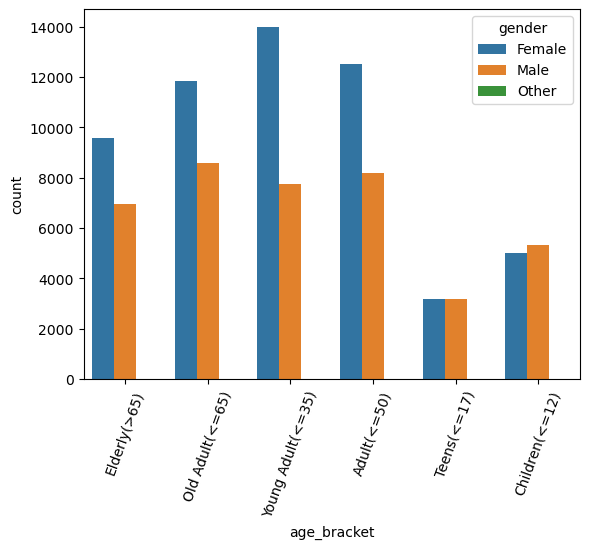

In [94]:
sns.countplot(x='age_bracket', hue='gender', data=data1)
plt.xticks(rotation=70)

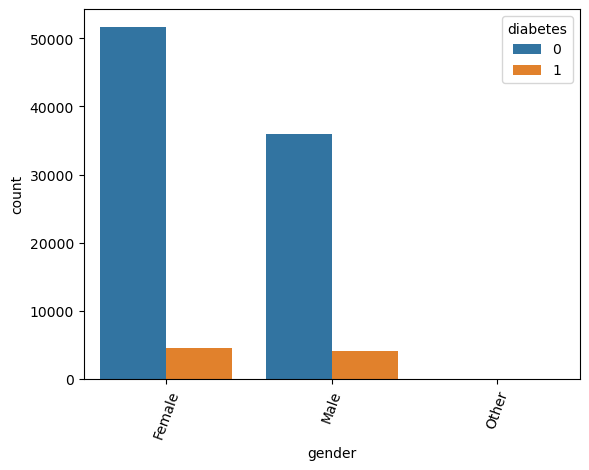

In [98]:
sns.countplot(x='gender', hue='diabetes', data=data1)
plt.xticks(rotation=70);

#### Multivariate Analysis

<Axes: >

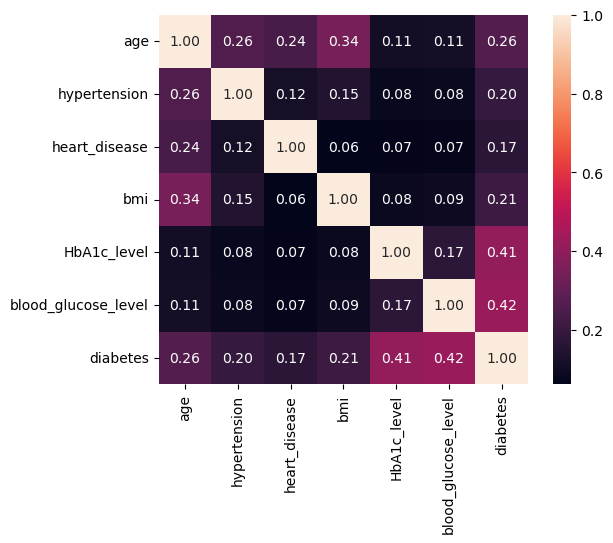

In [113]:
sns.heatmap(numerical_df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10})

For the Modelling aspect, because of the 'No Info' data on the 'smoking_history' feature, I am going to do it in 3 different scenarios to see the effect and which gives us the best outcome.
- Scenario 1: drop all records with 'No Info' value and work with the rest of the other values
- Scenario 2: drop the smoking history feature and see how the model performs
- Scenario 3: make an assumption that patients less that 10 yrs have not smoked before and convert all their 'smoking_history' value to 'never', drop all the other rows with 'No Info' value and see how the model performs

#### Data Pre-processing

##### Scenario 1

In [123]:
# make a copy of the dataset for this modelling

data_scenario_1 = data1.copy()

In [125]:
# drop all records with 'No Info' value and work with the rest of the other values
data_scenario_1 = data_scenario_1.drop(data_scenario_1[data_scenario_1.smoking_history == 'No Info'].index)

In [127]:
data_scenario_1.shape

(63259, 10)

In [129]:
data_scenario_1['smoking_history'].value_counts()

smoking_history
never      38396
former     15666
current     9197
Name: count, dtype: int64

In [111]:
data1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_bracket
0,Female,80.0,0,1,never,25.19,6.6,140,0,Elderly(>65)
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Old Adult(<=65)
2,Male,28.0,0,0,never,27.32,5.7,158,0,Young Adult(<=35)
3,Female,36.0,0,0,current,23.45,5.0,155,0,Adult(<=50)
4,Male,76.0,1,1,current,20.14,4.8,155,0,Elderly(>65)


In [131]:
label_1 = data_scenario_1['diabetes']

In [133]:
data_scenario_1 = data_scenario_1.drop(['age_bracket'], axis=1)
data_scenario_1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0


In [140]:
# Encoding categorical variables
encoder = LabelEncoder()

data_scenario_1['gender'] = encoder.fit_transform(data_scenario_1['gender'])
data_scenario_1['smoking_history'] = encoder.fit_transform(data_scenario_1['smoking_history'])

In [152]:
data_scenario_1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.712030,0,1,0.733176,-0.495380,0.942313,0.007331,0
2,1,-0.950116,0,0,0.733176,-0.170778,0.121507,0.433515,0
3,0,-0.540555,0,0,-1.990253,-0.760547,-0.516898,0.362485,0
4,1,1.507250,1,1,-1.990253,-1.264976,-0.699300,0.362485,0
5,0,-1.359677,0,0,0.733176,-0.170778,0.942313,-1.294900,0


In [150]:
# Standardize the data
cols = ['age', 'smoking_history','bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()
for i in cols:
    data_scenario_1[i] = scaler.fit_transform(data_scenario_1[[i]])

In [157]:
# Separate the dataset into features and labels
label_1 = data_scenario_1['diabetes']
features_1 = data_scenario_1.drop(['diabetes'], axis=1)

In [159]:
# split our data into training and test data

Xtrain_1, Xtest_1, ytrain_1, ytest_1 = train_test_split(features_1, label_1, test_size=0.2, random_state=42)

#### Model training and Evaluation

In [174]:
classifiers = [
    [LogisticRegression(random_state=42, class_weight={0:1, 1:2}), 'Logistic Regression'],
    [SGDClassifier(random_state=42, class_weight={0:1, 1:2}), 'SGD Classifier'],
    [RandomForestClassifier(random_state=42, class_weight={0:1, 1:2}), 'Random Forest'],
    [DecisionTreeClassifier(random_state=42, class_weight={0:1, 1:2}), 'Decision Tree'],
    [XGBClassifier(random_state=42, class_weight={0:1, 1:2}), 'XGBoost']
]

<------ Logistic Regression --------->
              precision    recall  f1-score   support

           0    0.96523   0.96968   0.96745     11279
           1    0.74111   0.71304   0.72680      1373

    accuracy                        0.94183     12652
   macro avg    0.85317   0.84136   0.84712     12652
weighted avg    0.94091   0.94183   0.94133     12652



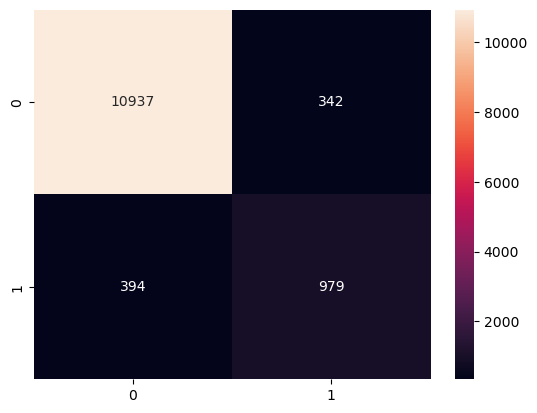

<------ SGD Classifier --------->
              precision    recall  f1-score   support

           0    0.96387   0.96737   0.96562     11279
           1    0.72372   0.70211   0.71275      1373

    accuracy                        0.93859     12652
   macro avg    0.84380   0.83474   0.83919     12652
weighted avg    0.93781   0.93859   0.93818     12652



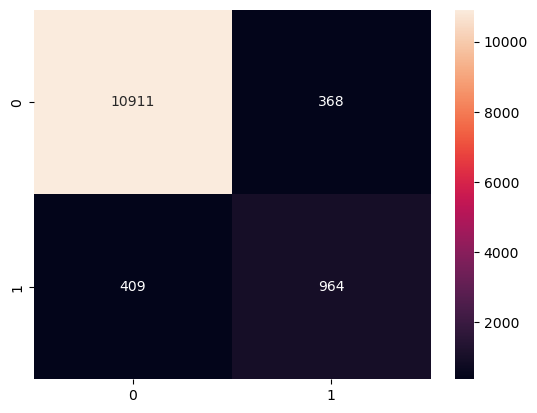

<------ Random Forest --------->
              precision    recall  f1-score   support

           0    0.96391   0.99441   0.97892     11279
           1    0.93799   0.69410   0.79782      1373

    accuracy                        0.96182     12652
   macro avg    0.95095   0.84426   0.88837     12652
weighted avg    0.96109   0.96182   0.95927     12652



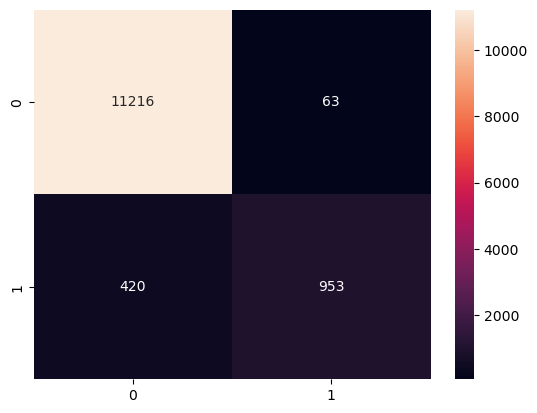

<------ Decision Tree --------->
              precision    recall  f1-score   support

           0    0.96880   0.96356   0.96617     11279
           1    0.71339   0.74508   0.72889      1373

    accuracy                        0.93985     12652
   macro avg    0.84109   0.85432   0.84753     12652
weighted avg    0.94108   0.93985   0.94042     12652



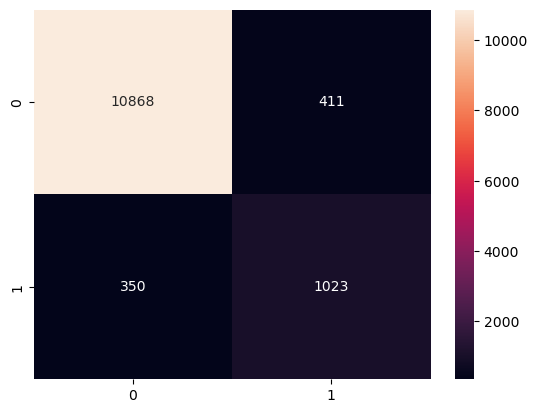

<------ XGBoost --------->


C:\Users\Ify\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:27:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0    0.96484   0.99521   0.97979     11279
           1    0.94695   0.70211   0.80636      1373

    accuracy                        0.96340     12652
   macro avg    0.95590   0.84866   0.89308     12652
weighted avg    0.96290   0.96340   0.96097     12652



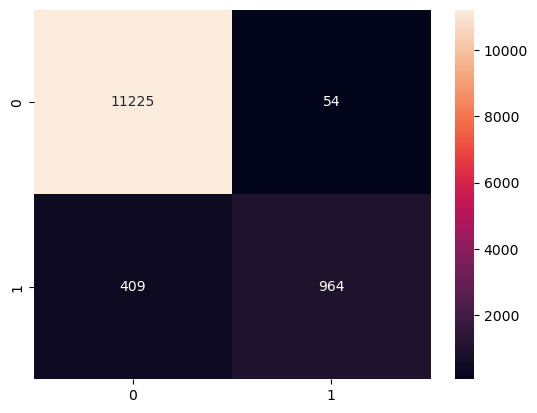

In [180]:
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    print(f'<------ {model_name} --------->')
    model.fit(Xtrain_1,ytrain_1)
    predictions = model.predict(Xtest_1)
    report = classification_report(ytest_1, predictions, digits=5)
    matrix=confusion_matrix(ytest_1, predictions)
    print(report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()

##### Scenario 2

In [186]:
# drop the smoking history feature
data_scenario_2 = data1.copy()
data_scenario_2 = data_scenario_2.drop(['age_bracket', 'smoking_history'], axis=1)
data_scenario_2.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0


In [190]:
data_scenario_2['gender'] = encoder.fit_transform(data_scenario_2['gender'])

In [192]:
# Standardize the data
cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()
for i in cols:
    data_scenario_2[i] = scaler.fit_transform(data_scenario_2[[i]])

In [194]:
# Separate the dataset into features and labels
label_2 = data_scenario_2['diabetes']
features_2 = data_scenario_2.drop(['diabetes'], axis=1)

In [196]:
# split our data into training and test data

Xtrain_2, Xtest_2, ytrain_2, ytest_2 = train_test_split(features_2, label_2, test_size=0.2, random_state=42)

<------ Logistic Regression --------->
              precision    recall  f1-score   support

           0    0.97004   0.97653   0.97327     17509
           1    0.74377   0.69320   0.71759      1721

    accuracy                        0.95117     19230
   macro avg    0.85690   0.83486   0.84543     19230
weighted avg    0.94979   0.95117   0.95039     19230



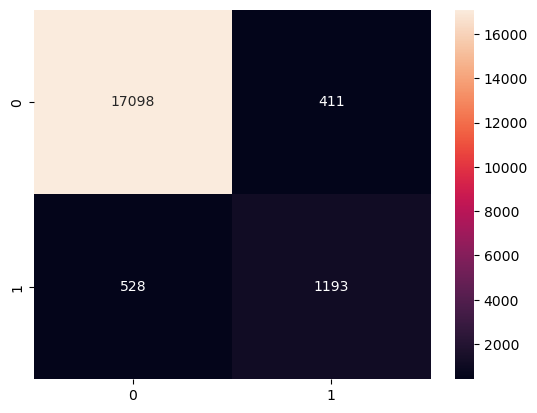

<------ SGD Classifier --------->
              precision    recall  f1-score   support

           0    0.96546   0.98664   0.97593     17509
           1    0.82498   0.64091   0.72139      1721

    accuracy                        0.95569     19230
   macro avg    0.89522   0.81377   0.84866     19230
weighted avg    0.95289   0.95569   0.95315     19230



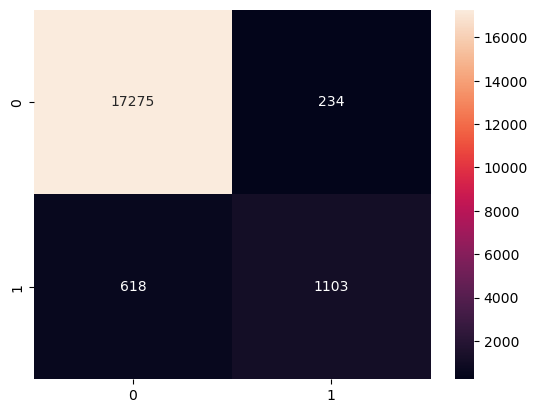

<------ Random Forest --------->
              precision    recall  f1-score   support

           0    0.97051   0.99417   0.98220     17509
           1    0.92117   0.69262   0.79071      1721

    accuracy                        0.96719     19230
   macro avg    0.94584   0.84340   0.88646     19230
weighted avg    0.96609   0.96719   0.96506     19230



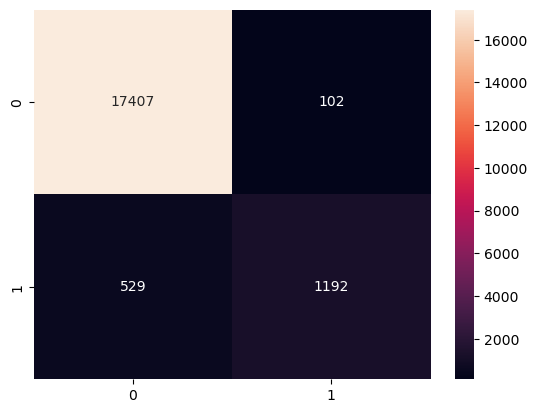

<------ Decision Tree --------->
              precision    recall  f1-score   support

           0    0.97380   0.96996   0.97187     17509
           1    0.70615   0.73446   0.72002      1721

    accuracy                        0.94888     19230
   macro avg    0.83997   0.85221   0.84595     19230
weighted avg    0.94984   0.94888   0.94933     19230



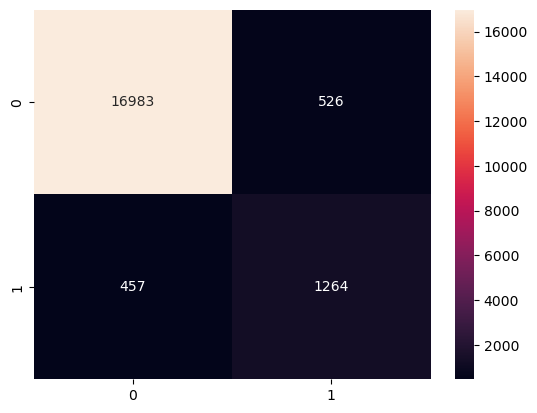

<------ XGBoost --------->


C:\Users\Ify\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:47:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0    0.97033   0.99760   0.98378     17509
           1    0.96583   0.68972   0.80475      1721

    accuracy                        0.97005     19230
   macro avg    0.96808   0.84366   0.89426     19230
weighted avg    0.96993   0.97005   0.96776     19230



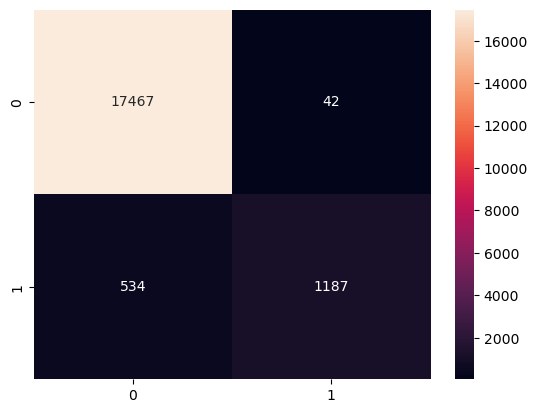

In [198]:
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    print(f'<------ {model_name} --------->')
    model.fit(Xtrain_2,ytrain_2)
    predictions = model.predict(Xtest_2)
    report = classification_report(ytest_2, predictions, digits=5)
    matrix=confusion_matrix(ytest_2, predictions)
    print(report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()

##### Scenario 3

In [202]:
data_scenario_3 = data1.copy()

In [204]:
# change all the smoking history values to never for entries with age less that 10
data_scenario_3['smoking_history'] = data_scenario_3.apply(lambda x: 'never' if x['age'] <= 10 else x['smoking_history'], axis=1)

In [216]:
# drop all records with 'No Info' value and work with the rest of the other values
data_scenario_3 = data_scenario_3.drop(data_scenario_3[data_scenario_3.smoking_history == 'No Info'].index)

In [218]:
data_scenario_3['smoking_history'].value_counts()

smoking_history
never      47430
former     15444
current     9176
Name: count, dtype: int64

In [220]:
data_scenario_3 = data_scenario_3.drop(['age_bracket'], axis=1)

In [222]:
data_scenario_3['gender'] = encoder.fit_transform(data_scenario_3['gender'])
data_scenario_3['smoking_history'] = encoder.fit_transform(data_scenario_3['smoking_history'])

In [224]:
# Standardize the data
cols = ['age', 'smoking_history','bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()
for i in cols:
    data_scenario_3[i] = scaler.fit_transform(data_scenario_3[[i]])

In [226]:
# Separate the dataset into features and labels
label_3 = data_scenario_3['diabetes']
features_3 = data_scenario_3.drop(['diabetes'], axis=1)

In [228]:
# split our data into training and test data

Xtrain_3, Xtest_3, ytrain_3, ytest_3 = train_test_split(features_3, label_3, test_size=0.2, random_state=42)

<------ Logistic Regression --------->
              precision    recall  f1-score   support

           0    0.96975   0.97281   0.97128     13019
           1    0.73778   0.71603   0.72674      1391

    accuracy                        0.94802     14410
   macro avg    0.85377   0.84442   0.84901     14410
weighted avg    0.94736   0.94802   0.94767     14410



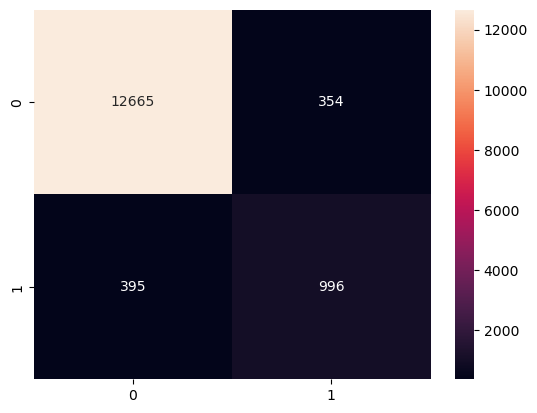

<------ SGD Classifier --------->
              precision    recall  f1-score   support

           0    0.96101   0.99017   0.97537     13019
           1    0.87149   0.62401   0.72727      1391

    accuracy                        0.95482     14410
   macro avg    0.91625   0.80709   0.85132     14410
weighted avg    0.95237   0.95482   0.95142     14410



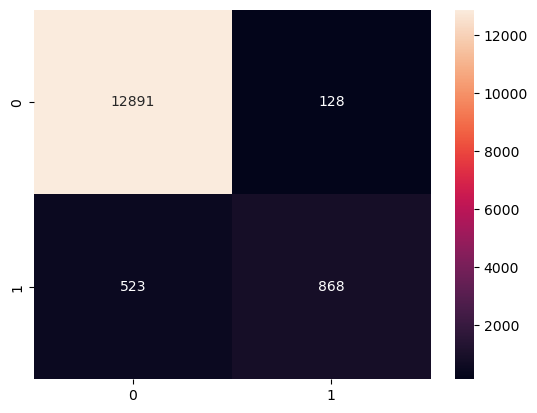

<------ Random Forest --------->
              precision    recall  f1-score   support

           0    0.96820   0.99401   0.98094     13019
           1    0.92529   0.69446   0.79343      1391

    accuracy                        0.96509     14410
   macro avg    0.94675   0.84424   0.88718     14410
weighted avg    0.96406   0.96509   0.96284     14410



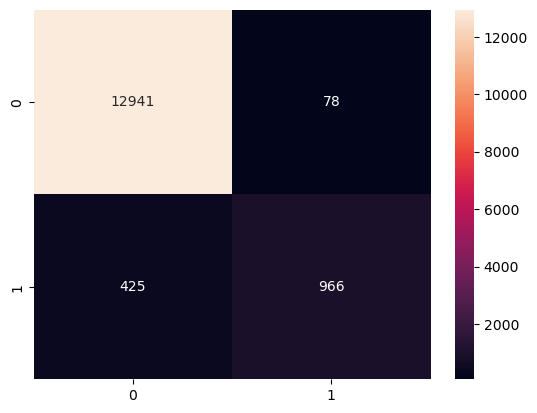

<------ Decision Tree --------->
              precision    recall  f1-score   support

           0    0.97285   0.96613   0.96948     13019
           1    0.70223   0.74766   0.72423      1391

    accuracy                        0.94504     14410
   macro avg    0.83754   0.85689   0.84686     14410
weighted avg    0.94673   0.94504   0.94580     14410



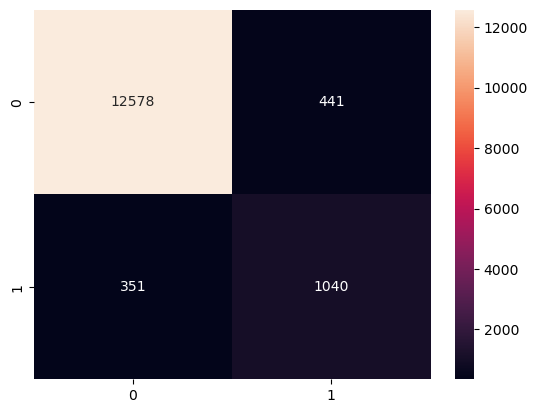

<------ XGBoost --------->


C:\Users\Ify\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:36:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0    0.96875   0.99547   0.98193     13019
           1    0.94283   0.69950   0.80314      1391

    accuracy                        0.96690     14410
   macro avg    0.95579   0.84748   0.89253     14410
weighted avg    0.96625   0.96690   0.96467     14410



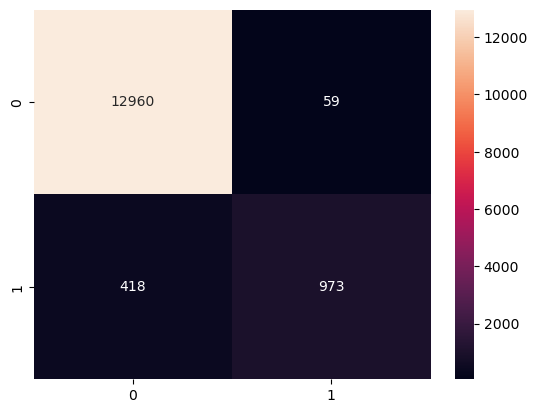

In [230]:
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    print(f'<------ {model_name} --------->')
    model.fit(Xtrain_3,ytrain_3)
    predictions = model.predict(Xtest_3)
    report = classification_report(ytest_3, predictions, digits=5)
    matrix=confusion_matrix(ytest_3, predictions)
    print(report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()

#### Hyper Parameter tuning


In [237]:
param_grid = {
    'max_depth':[None, 20, 30, 40],
    'min_samples_split': [4,5,7,9],
    'class_weight':[{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:4},{0:1, 1:5}]
}

In [243]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid= param_grid, cv=5, scoring='recall')

In [245]:
grid_search.fit(Xtrain_1, ytrain_1)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1, 1: 4}, {0: 1, 1: 5}],
                         'max_depth': [None, 20, 30, 40],
                         'min_samples_split': [4, 5, 7, 9]},
             scoring='recall')

In [247]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.5f}')

Best Parameters: {'class_weight': {0: 1, 1: 5}, 'max_depth': 20, 'min_samples_split': 9}
Best Score: 0.80


In [ ]:
DecisionTreeClassifier(random_state=42, class_weight={0:1, 1:2})

<------ Decision Tree --------->
              precision    recall  f1-score   support

           0    0.97315   0.94166   0.95715     11279
           1    0.62140   0.78660   0.69431      1373

    accuracy                        0.92483     12652
   macro avg    0.79728   0.86413   0.82573     12652
weighted avg    0.93498   0.92483   0.92863     12652



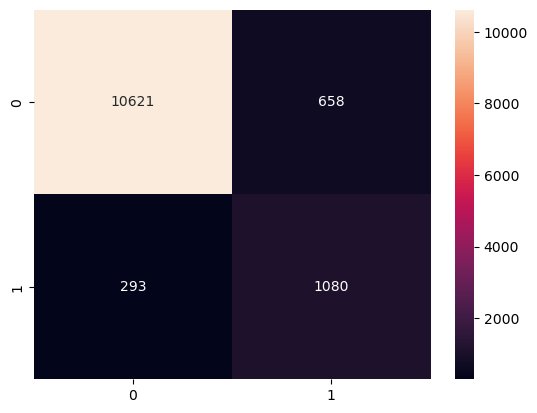

In [253]:
model = DecisionTreeClassifier(random_state=42, class_weight={0: 1, 1: 5}, max_depth= 20, min_samples_split= 9)
model_name = 'Decision Tree'
print(f'<------ {model_name} --------->')
model.fit(Xtrain_1,ytrain_1)
predictions = model.predict(Xtest_1)
report = classification_report(ytest_1, predictions, digits=5)
matrix=confusion_matrix(ytest_1, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt='g')
plt.show()

In [255]:
grid_search.fit(Xtrain_3, ytrain_3)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1, 1: 4}, {0: 1, 1: 5}],
                         'max_depth': [None, 20, 30, 40],
                         'min_samples_split': [4, 5, 7, 9]},
             scoring='recall')

In [257]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.5f}')

Best Parameters: {'class_weight': {0: 1, 1: 5}, 'max_depth': 20, 'min_samples_split': 9}
Best Score: 0.78757


<------ Decision Tree --------->
              precision    recall  f1-score   support

           0    0.97788   0.94063   0.95889     13019
           1    0.59036   0.80086   0.67968      1391

    accuracy                        0.92713     14410
   macro avg    0.78412   0.87074   0.81929     14410
weighted avg    0.94047   0.92713   0.93194     14410



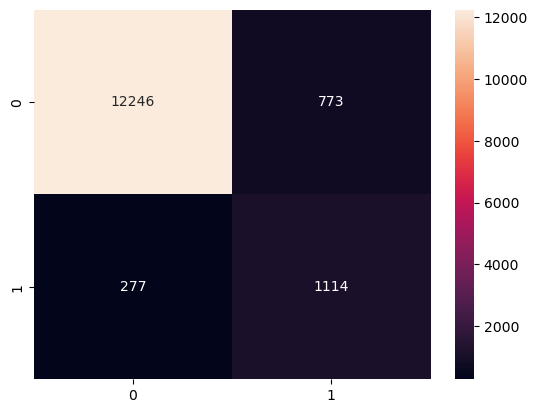

In [259]:
model = DecisionTreeClassifier(random_state=42, class_weight={0: 1, 1: 5}, max_depth= 20, min_samples_split= 9)
model_name = 'Decision Tree'
print(f'<------ {model_name} --------->')
model.fit(Xtrain_3,ytrain_3)
predictions = model.predict(Xtest_3)
report = classification_report(ytest_3, predictions, digits=5)
matrix=confusion_matrix(ytest_3, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt='g')
plt.show()